In [1]:
import numpy as np

In [2]:
pred_result_fn = '/zfssz2/ST_MCHRI/BIGDATA/PROJECT/NIPT_CNV/1dcnn_resnet/models/test0.10_win1000_minsize160000_pred.npz'
with np.load(pred_result_fn) as pred_result:
    ypred=pred_result['ypred']
    ytrue=pred_result['ytrue']
    

In [4]:
ypred_l = np.argmax(ypred, axis=1)
ytrue_l = np.argmax(ytrue, axis=1)


In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#from pandas_ml import ConfusionMatrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.4f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Normalized confusion matrix
[[0.95492671 0.03386145 0.01121184]
 [0.01126574 0.96365636 0.0250779 ]
 [0.00502055 0.0360702  0.95890925]]


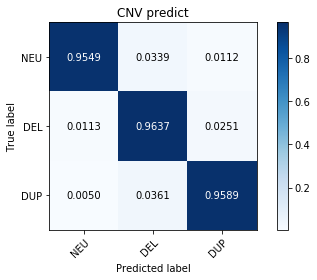

In [13]:

class_names=np.array(['NEU','DEL','DUP'])
plot_confusion_matrix(ytrue_l, ypred_l, classes=class_names, normalize=True,title='CNV predict')


In [1]:
#  calculate 
def get_cls_reports(y_true,y_pred):
    cm = confusion_matrix(y_true, y_pred)
    
    FP = cm.sum(axis=0) - np.diag(cm)  
    FN = cm.sum(axis=1) - np.diag(cm)
    TP = np.diag(cm)
    TN = cm.sum() - (FP + FN + TP)
    
    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    
    # Specificity or true negative rate
    TNR = TN/(TN+FP) 
    
    # Precision or positive predictive value
    PPV = TP/(TP+FP)

    # Negative predictive value
    NPV = TN/(TN+FN)

    # Fall out or false positive rate
    FPR = FP/(FP+TN)

    # False negative rate or Miss Rate
    FNR = FN/(TP+FN)
    
    # False discovery rate
    FDR = FP/(TP+FP)
    
    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)
    
    return (TPR, TNR, PPV,NPV,FPR,FNR,FDR,ACC)

In [15]:
from pandas_ml import ConfusionMatrix
# from pycm import ConfusionMatrix
confusion_matrix = ConfusionMatrix(ytrue_l, ypred_l)
confusion_matrix.print_stats()

/zfssz2/ST_MCHRI/BIGDATA/USER/baiyong/anaconda3/lib/python3.6/site-packages/pandas_ml/confusion_matrix/stats.py:60: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  num = df[df > 1].dropna(axis=[0, 1], thresh=1).applymap(lambda n: choose(n, 2)).sum().sum() - np.float64(nis2 * njs2) / n2
/zfssz2/ST_MCHRI/BIGDATA/USER/baiyong/anaconda3/lib/python3.6/site-packages/pandas_ml/confusion_matrix/stats.py:60: RuntimeWarning: overflow encountered in long_scalars
  num = df[df > 1].dropna(axis=[0, 1], thresh=1).applymap(lambda n: choose(n, 2)).sum().sum() - np.float64(nis2 * njs2) / n2
/zfssz2/ST_MCHRI/BIGDATA/USER/baiyong/anaconda3/lib/python3.6/site-packages/pandas_ml/confusion_matrix/stats.py:61: RuntimeWarning: overflow encountered in long_scalars
  den = (np.float64(nis2 + njs2) / 2 - np.float64(nis2 * njs2) / n2)
/zfssz2/ST_MCHRI/BIGDATA/USER/baiyong/anaconda3/lib/python3.6/site-packages/pandas_ml/confusion_matrix/bcm.py:302: RuntimeWar

Confusion Matrix:

Predicted      0       1       2  __all__
Actual                                   
0          67626    2398     794    70818
1           2274  194515    5062   201851
2           1859   13356  355063   370278
__all__    71759  210269  360919   642947


Overall Statistics:

Accuracy: 0.9599609299055755
95% CI: (0.9594788617031612, 0.9604388480631074)
No Information Rate: ToDo
P-Value [Acc > NIR]: 0.0
Kappa: 0.9287240754346627
Mcnemar's Test P-Value: ToDo


Class Statistics:

Classes                                         0          1          2
Population                                 642947     642947     642947
P: Condition positive                       70818     201851     370278
N: Condition negative                      572129     441096     272669
Test outcome positive                       71759     210269     360919
Test outcome negative                      571188     432678     282028
TP: True Positive                           67626     194515     3550

In [47]:
# train result
import pandas as pd
train_result_fn = '/zfssz2/ST_MCHRI/BIGDATA/PROJECT/NIPT_CNV/1dcnn_resnet/models/train.log.tsv'
train_acc = pd.read_csv(train_result_fn, sep='\s+', header=None)
train_acc.columns=['Epoch','N_Epoch','Kfold','train_loss', 'train_acc','val_loss','val_acc']
train_acc['N_Epoch'] = train_acc['N_Epoch'].str.split('/').str[0]
train_acc['N_Epoch'].astype(int)
train_acc.head()



,Epoch,N_Epoch,Kfold,train_loss,train_acc,val_loss,val_acc
0,Epoch,1,1,0.9569,0.5968,0.8821,0.6171
1,Epoch,2,1,0.7587,0.6652,0.7618,0.6579
2,Epoch,3,1,0.7516,0.6744,0.8258,0.6180
3,Epoch,4,1,0.6648,0.7131,0.6313,0.7316
4,Epoch,5,1,0.5236,0.7867,0.4535,0.8258


In [48]:
train_re = train_acc[train_acc['Kfold']==1]


[Text(0,0,'1'),
 Text(0,0,'2'),
 Text(0,0,'3'),
 Text(0,0,'4'),
 Text(0,0,'5'),
 Text(0,0,'6'),
 Text(0,0,'7'),
 Text(0,0,'8'),
 Text(0,0,'9'),
 Text(0,0,'10'),
 Text(0,0,'11'),
 Text(0,0,'12'),
 Text(0,0,'13'),
 Text(0,0,'14'),
 Text(0,0,'15'),
 Text(0,0,'16'),
 Text(0,0,'17'),
 Text(0,0,'18'),
 Text(0,0,'19'),
 Text(0,0,'20')]

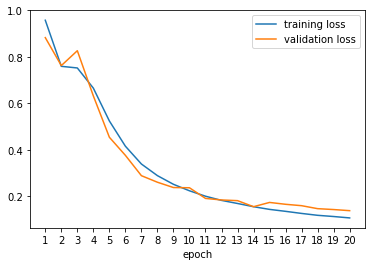

In [60]:
fig, ax = plt.subplots()
train_re.plot(ax=ax, kind='line',x='N_Epoch', y='train_loss', label='training loss')
train_re.plot(ax=ax, kind='line',x='N_Epoch', y='val_loss', label='validation loss')
ax.set_xlabel("epoch")
ax.set_xticks(train_re.index)
ax.set_xticklabels(train_re['N_Epoch'])


[Text(0,0,'1'),
 Text(0,0,'2'),
 Text(0,0,'3'),
 Text(0,0,'4'),
 Text(0,0,'5'),
 Text(0,0,'6'),
 Text(0,0,'7'),
 Text(0,0,'8'),
 Text(0,0,'9'),
 Text(0,0,'10'),
 Text(0,0,'11'),
 Text(0,0,'12'),
 Text(0,0,'13'),
 Text(0,0,'14'),
 Text(0,0,'15'),
 Text(0,0,'16'),
 Text(0,0,'17'),
 Text(0,0,'18'),
 Text(0,0,'19'),
 Text(0,0,'20')]

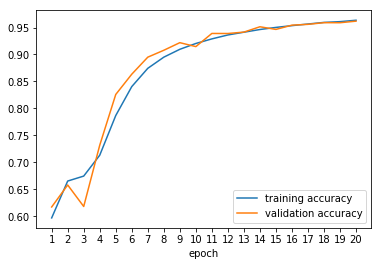

In [61]:
fig, ax = plt.subplots()
train_re.plot(ax=ax, kind='line',x='N_Epoch', y='train_acc', label='training accuracy')
train_re.plot(ax=ax, kind='line',x='N_Epoch', y='val_acc', label='validation accuracy')
ax.set_xlabel("epoch")
ax.set_xticks(train_re.index)
ax.set_xticklabels(train_re['N_Epoch'])